<a href="https://colab.research.google.com/github/brunomoraes87/Data_Science_Project/blob/master/Analisando_os_Dados_do_Airbnb_Londres.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - *Londres*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade. Mesmo sem possuírem nenhum hotel!**

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando assim, as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html) é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Londres e, ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Os dados desse estudo foram retirados do dataset [Inside Airbnb](http://insideairbnb.com/), referentes ao estado de Londres.

* listings.csv - Summary information and metrics for listings in London (Good for Visualisations)

Para realizar a análise do dataset em questão, foram usadas as bibliotecas:

* Pandas
* Matplotlib
* Seaborn

In [0]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/united-kingdom/england/london/2020-04-14/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

* Id - Número de id gerado para identificar o imóvel
* Name - Nome da Propriedade Anunciada
* host_id - Número de id do proprietário (anfitrião) da propriedade
* host_name - Nome do anfitrião
* neighbourhood_group - Grupo do Bairro
* neighbourhood - Nome do Bairro
* latitude - Coordenada da latitudade da propriedade
* longitude - Coordenada da longitude da propriedade
* room_type - Informa o tipo de quarto que é oferecido
* price - Preço para alugar o imóvel
* minimun_nights - Quantidade mínima de noites para reservar
* number_of_reviews - Número de reviews que a propriedade possui
* last_review - Data do último review
* reviews_per_moth - Quantidade de reviews por mês 
* calculated_host_listing_count - Quantidade de imóveis do mesmo anfitrião
* availability_365 - Número de dias de disponibilidade dentro de 365 dias

### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**
No Dataset avaliado, podemos observar que em 16 variáves tivemos entrada de 86.358 dados, sendo elas do tipo:
* Números Inteiros
* Strings
* Números Decimais

Visualizando as primeiras 5 linhas, identificamos que, todos os dados da coluna "neighbourhood_group" não continham valores válidos, com isso, iremos aprofundar a análise sobre a validade dos dados das 16 variáveis.

In [0]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))
# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 86358
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [0]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,13913,Holiday London DB Room Let-on going,54730,Alina,NaN,Islington,51.56802,-0.11121,Private room,65,1,21,2020-02-22,0.18,2,359
1,15400,Bright Chelsea Apartment. Chelsea!,60302,Philippa,NaN,Kensington and Chelsea,51.48796,-0.16898,Entire home/apt,100,10,89,2020-03-16,0.71,1,232
2,17402,Superb 3-Bed/2 Bath & Wifi: Trendy W1,67564,Liz,NaN,Westminster,51.52195,-0.14094,Entire home/apt,300,3,42,2019-11-02,0.38,15,307
3,17506,Boutique Chelsea/Fulham Double bed 5-star ensuite,67915,Charlotte,NaN,Hammersmith and Fulham,51.47935,-0.19743,Private room,150,3,0,NaN,NaN,2,362
4,25023,All-comforts 2-bed flat near Wimbledon tennis,102813,Amanda,NaN,Wandsworth,51.44687,-0.21874,Entire home/apt,65,21,35,2020-03-30,0.70,1,15


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**
Podemos observar que das 16 variáveis analisadas, 3 delas apresentaram problemas relevantes com a validade de dados, sendo elas:

* **Grupo do Bairro (Neighbourhood_Group)** - Apresentou inconsistência em **100%** dos dados
* **Quantidade de Reviews por Mês (Reviews_per_Month)** - Apresentou inconsistência em **25%** dos dados
* **Último Review (Last_Review)** - Apresentou inconsistência de **25%** dos dados



In [0]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.249149
last_review                       0.249149
name                              0.000278
host_name                         0.000116
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Das 16 variáveis do dataset, 5 são strings o que impossibilita a plotagem de gráficos. Abaixo iremos analisar cada gráfico:

* **Número de dias de disponibilidade dentro de 365 dias (availability_365)** - A tendência de disponibilidade tem pico na primeira coluna do histograma, o que indica que a disponibilidade de dias é baixa. Isso pode ocorrer por opção do anfitrião limitar a quantidade de dias para aluguel ou grande demanda.
* **Quantidade de imóveis do mesmo anfitrião (calculated_host_listing_count)** -   Podemos observar que os anfitriões não possuem muitos imovéis cadastrados no Airbnb, **também é possivel notar 3 parâmetros que podem indicar outliers.**
* **Número de id do anfitrião da propriedade (host_id)** - Código de identificação do anfitrião, não aplicável à análise.
* **Número de id gerado para identificar o imóvel (Id)** - Código de identificação do imóvel, não aplicável à análise.
* **Latitude** - Coordenada da latitudade da propriedade, não aplicável à análise.
* **Longitude** - Coordenada da longitude da propriedade, não aplicável à análise.
* **Quantidade mínima de noites para reservar (minimun_nights)** - O histograma indica que o período mínimo de noites para reservas é baixo, tendo o seu pico na primeira coluna do histograma. **Também é possivel notar 2 parâmetros que podem indicar outliers.**
* **Grupo do Bairro (neighbourhood_group)** - Variável sem dados válidos.
* **Número de reviews que a propriedade possui (number_of_reviews)** - O gráfico mostra que maior parte dos imóveis tem poucos reviews, isso pode indicar que tem pouco tempo que os imóveis ficaram disponíveis para aluguel no Airbnb.
* **Preço (price)** - Podemos observar que a variação de preço entre os imóveis não é significativa.
* **Quantidade de reviews por mês (reviews_per_moth)** - Podemos observar que os imóveis podem ser alugados um poucos mais de 5 vezes por mês. Mas, ainda assim, a maior parte é alugada 1 vez por mês.  

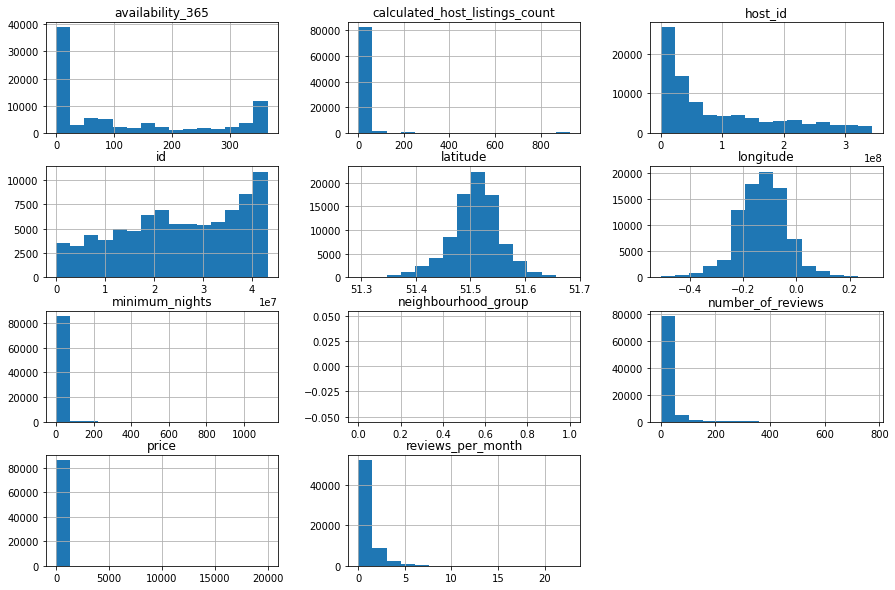

In [0]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Há Outliers Presentes?**

Podemos observar outliers nas variáveis: **Quantidade Minima de noites para reservar** e **Quantidade de imóveis do mesmo Anfitrião**.

* **Quantidade Minima de Noites para Reservar (minimum_nights)** - Iremos desconsiderar valores superiores a 30 dias.
* **Quantidade de Imóveis do Mesmo Anfitrião (calculated_host_listing_count)** - Iremos deconsiderar valores superiores a 50 imóveis.
* **Preço (price)** - Iremos desconsiderar valores superiores a 2500 libras.

In [0]:
# Ver resumo estatístico das variáveis numéricas
df[["price","minimum_nights","number_of_reviews","reviews_per_month","calculated_host_listings_count","availability_365"]].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,86358.000000,86358.000000,86358.000000,64842.000000,86358.000000,86358.000000
mean,129.610725,4.474490,17.531277,0.963183,20.987448,116.328898
std,289.484146,19.151568,37.393948,1.177591,100.232081,135.293902
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,47.000000,1.000000,1.000000,0.200000,1.000000,0.000000
50%,83.000000,2.000000,4.000000,0.560000,1.000000,63.000000
75%,140.000000,3.000000,17.000000,1.270000,5.000000,237.000000
max,19985.000000,1125.000000,773.000000,22.690000,928.000000,365.000000


#### Boxplot para minimum_nights

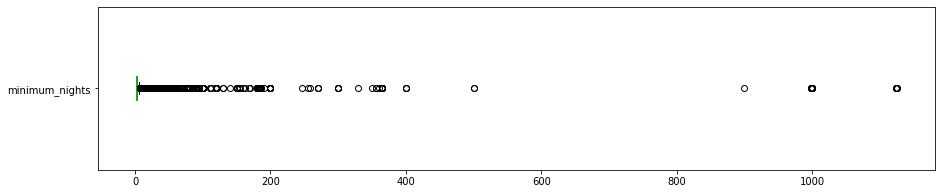

minimum_nights: Valores acima de 30:
Entradas: 1036
1.1997%


In [0]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# Ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: Valores acima de 30:")
print("Entradas: {}".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Boxplot para calculated_host_listings_count

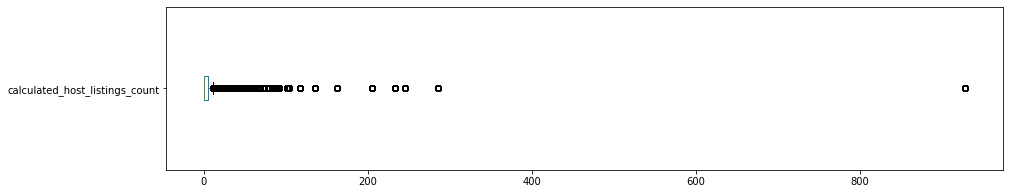


calc_host: Valores acima de 50
5360 entradas
6.2067%


In [0]:
df.calculated_host_listings_count.plot(kind="box", vert=False,figsize=(15,3),)
plt.show()

# Ver quantidade de valores acima de 50 para calculated_host_listing_count
print("\ncalc_host: Valores acima de 50")
print("{} entradas".format(len(df[df.calculated_host_listings_count > 50])))
print("{:.4f}%".format((len(df[df.calculated_host_listings_count > 50]) / df.shape[0])*100))

####Boxplot para price

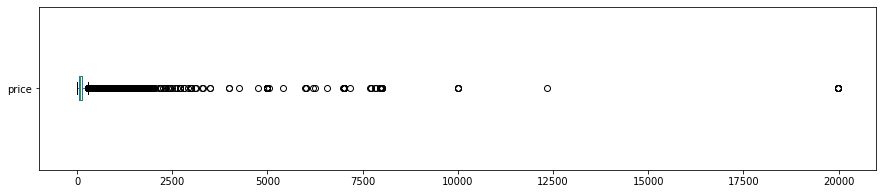


price: Valores acima de 2500
87 entradas
0.1007%


In [0]:
df.price.plot(kind="box", vert=False,figsize=(15,3),)
plt.show()

# Ver quantidade de valores acima de 2500 para price
print("\nprice: Valores acima de 2500")
print("{} entradas".format(len(df[df.price > 2500])))
print("{:.4f}%".format((len(df[df.price > 2500]) / df.shape[0])*100))

### Histograma sem outliers

Eliminamos outliers de duas variáveis e o cenário atualizado delas ficou:

* **Quantidade mínima de noites para reservar (minimun_nights)** - Podemos observar que o maior volume mínimo de reserva está entre 1 a 5 dias.
* **Quantidade de Imóveis do Mesmo Anfitrião (calculated_host_list_count)** - A maior parte dos anfitriões possuem entre 1 a 10 imóveis
* **Preço (price)** - A maior parte dos imóveis possui o valor do aluguel até 200 libras.

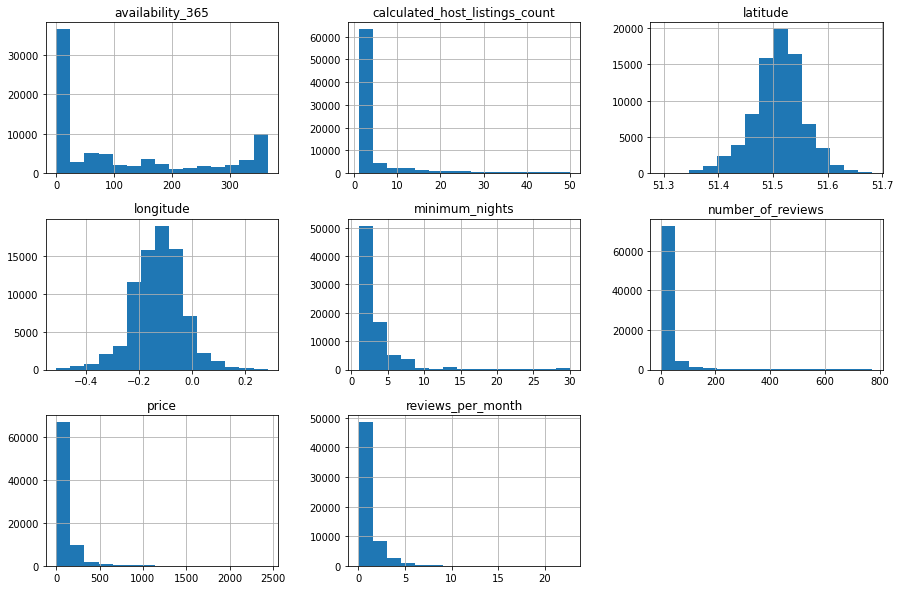

In [0]:
# Remover os outliers em um novo DataFrame

df_clean = df.copy()
df_clean.drop(df_clean[df_clean.calculated_host_listings_count > 50].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price > 2500].index, axis=0, inplace=True)

# Remover neighbourhood_group, pois está é vazio
df_clean.drop("neighbourhood_group", axis=1, inplace=True)
df_clean.drop("host_id", axis=1, inplace=True)
df_clean.drop("id", axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a correlação existente entre as variáveis**

A correlação mais forte entre as variáves estão em Número de reviews que a propriedade possui (number_of_reviews) e Quantidade de Reviews por mês(reviews_per_month)

In [0]:
# criar uma matriz de correlação
corr = df_clean[["price","minimum_nights","number_of_reviews","reviews_per_month","calculated_host_listings_count","availability_365"]].corr()

display(corr)
# mostrar a matriz de correlação


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.028252,-0.083039,-0.042974,0.245757,0.138699
minimum_nights,0.028252,1.000000,-0.091549,-0.157995,0.028816,0.016167
number_of_reviews,-0.083039,-0.091549,1.000000,0.677708,0.004866,0.124864
reviews_per_month,-0.042974,-0.157995,0.677708,1.000000,0.089376,0.139919
calculated_host_listings_count,0.245757,0.028816,0.004866,0.089376,1.000000,0.255893
availability_365,0.138699,0.016167,0.124864,0.139919,0.255893,1.000000


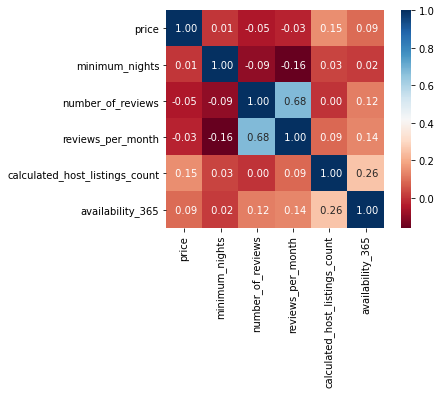

In [0]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap="RdBu", fmt=" .2f", square=True, linecolor="white", annot=True);


### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**
Mais da metade da procura dos imóveis são em apartamentos, segue o ranking abaixo:

* Entire Home/Apt - **54,3%**
* Private Room - **44,2%**
* Shared Room - **0,08%**
* Hotel Room - **0,07%**

In [0]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    43402
Private room       35348
Shared room          650
Hotel room           524
Name: room_type, dtype: int64

In [0]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.543041
Private room       0.442270
Shared room        0.008133
Hotel room         0.006556
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara de Londres?**
O Bairro mais caro de Londres é Westminster, o seu preço médio de aluguel é de 197 Libras.



In [0]:
# ver preços por bairros, na média
df_clean.groupby(["neighbourhood"]).price.mean().sort_values(ascending=False)


neighbourhood
Westminster               197.860353
Kensington and Chelsea    194.654556
City of London            186.216837
Camden                    142.580404
Hammersmith and Fulham    134.014152
Richmond upon Thames      114.575916
Southwark                 111.394271
Islington                 109.340827
Wandsworth                103.048937
Hounslow                   96.860978
Merton                     96.241860
Brent                      95.388235
Lambeth                    95.210133
Tower Hamlets              93.536668
Hackney                    89.902575
Greenwich                  88.352493
Ealing                     87.975638
Barnet                     86.762531
Newham                     82.975694
Kingston upon Thames       80.723247
Harrow                     78.004320
Haringey                   77.900417
Redbridge                  70.453920
Sutton                     69.739683
Waltham Forest             68.608212
Lewisham                   67.985146
Hillingdon              

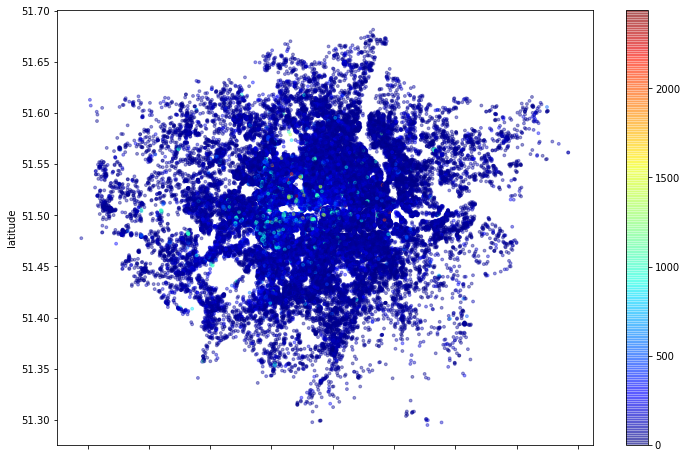

In [0]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, c=df_clean["price"], s=8, 
              cmap=plt.get_cmap('jet'), figsize=(12,8));


### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

As pessoas permancem em média 3 noites em londres.

In [0]:
# ver a média da coluna `minimum_nights``

df_clean.minimum_nights.describe()

count    79924.000000
mean         3.109567
std          4.025673
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         30.000000
Name: minimum_nights, dtype: float64

###**Q8. Qual é a média de preço por noite para aluguel (price)?**
O preço médio por noite é de 140 libras.

In [0]:
# ver a média da coluna `price``

df_clean.price.describe()

count    79924.000000
mean       115.833504
std        140.976496
min          0.000000
25%         45.000000
50%         80.000000
75%        130.000000
max       2440.000000
Name: price, dtype: float64

## Conclusões


A base analisada apresentou algumas inconsistências que foram eliminadas para não influenciar o entendimento do estudo. Sendo elas:

* Grupo do Bairro (neighbourhood_group) - Não apresentou dados para análise
* Quantidade Mínima de Noites para Reservar (minimum_nights) - Desconsideramos valores superiores a 30 dias.
* Quantidade de Imóveis do Mesmo Anfitrião (calculated_host_listing_count) - Desconsideramos valores superiores a 50 imóveis
* Preço (price) - Desconsideramos valores superiores a 2500 libras

As pessoas que utilizam o serviço do airbnb na cidade de londres:

* O **preço médio** da diária em londres é de **140 libras**
* **Westminster é o bairro mais caro**, o valor médio do aluguel diário é de **194 libras**.
* **A maior parte dos imóveis tem poucos reviews**, o que pode indicar que ficaram disponíveis recentemente.
* **Mais da metade (54%)** das pessoas que buscam se hospedar em londres, procuram por **apartamentos**.
* Para os inquilinos que buscam alugar outro imóvel do mesmo anfitrião, a possibilidade de acontecer é baixa, **a maior parte dos anfitriões não possuem muitos imóveis cadastrados no Airbnb**.
* A maior parte dos anfitriões **não permitem** permanência por **períodos longos**
* Na maior parte dos imóveis, os anfitriões estabelecem que a **permanência mínima é entre 1 a 5 dias**
* Os hóspedes **permanecem em média por 3 dias**